In [ ]:
# Import the libraries needed
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# 1. Load the dataset and print how many data instances (samples) we have
dataset = pd.read_csv('/content/drive/MyDrive/IA_764/concrete.csv')
dataset = pd.DataFrame(dataset)
# show dataset info
dataset.info()

In [ ]:
# show dataset info - describe dataset
dataset.describe()

In [ ]:
# show dataset info - top 10 rows
dataset.head(10)

In [ ]:
# 2. Check if there are any missing values in any of the columns
# using isnull() function
dataset.isnull()


In [63]:
# 3.Split the data into the features and the target 
# Print first few rows of X and y.
dataset = dataset.values 
# Features
x = dataset[:,0].reshape(-1,1)
# Target 
y = dataset[:,1]

In [ ]:
# plot the data set
plt.scatter(x, y)

In [ ]:
# Print first few rows of x - top 10 rows
print(x[:10])

In [ ]:
# Print first few rows of y
print(y)

In [ ]:
# 4.Normalize all columns of X using standardization.
x_standardized = preprocessing.scale(x, axis=0) 
# Print first few rows of standardized X - top 10 rows
print(x_standardized[:10])

In [73]:
#learning rate scheduler
def learning_rate_scheduler(epoch,lr):
  if epoch>=50:
    return 0.0001
  return 0.001

In [88]:
# let build a simple NN Regression model
def mnRegressionModel(x, y, optimizer_value):
  regressor=LinearRegression()
  regressor.fit(x,y)

  # Now lets define our Tensorflow model
  model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=[1])
  ])

  # Specifying learning rate and momentum with desired optimizer
  # 30% of thedata for validation
  if optimizer_value is 'SGD':
    model.compile(
        optimizer=tf.keras.optimizers.SGD(0.01, 0.3),loss='mse'
        )
  elif optimizer_value is 'Adam':
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001, 0.3),loss='mse'
        )
  else:
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(0.001, 0.3),loss='mse'
        )

  # learning rate scheduler 
  # calling learning_rate_scheduler function 
  scheduler=tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)
  
  # Train the model
  # Fit function has a parameter for batch_size. 
  # If unspecified batch_sizewill default to 32.
  # Run it for 100 epochs
  r = model.fit(x,y, epochs=100, verbose=0, callbacks=[scheduler]) 

  # get model weights
  weights = model.layers[0].get_weights()

  model_result = {
        "Intercept": regressor.intercept_,
        "Coefficient of Regressin": regressor.coef_,
        "Weoghts": weights
    }

  return model_result, r

In [84]:
def show_result(x, y, optimizer):
  output = mnRegressionModel(x, y, optimizer)[0]
  r = mnRegressionModel(x, y, optimizer)[1]
  plt.plot(r.history['loss'])
  print(output)

{'Intercept': 73.89582524271844, 'Coefficient of Regressin': array([-23.73391793]), 'Weoghts': [array([[-2.256771]], dtype=float32), array([1.7691966], dtype=float32)]}


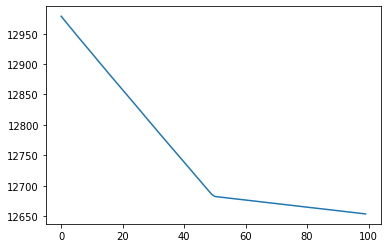

In [89]:
# 5.Build a simple NN Regression model that has one Dense unit. 
# Specify mean_squared_errorfor the loss and adam for optimizer. 
# Allocate 30% of the data for validation. Run it for 100 epochs. 
# Plot the loss plot for training and validation.
show_result(x_standardized,y, 'Adam')

{'Intercept': 73.89582524271844, 'Coefficient of Regressin': array([-23.73391793]), 'Weoghts': [array([[-23.669235]], dtype=float32), array([73.44553], dtype=float32)]}


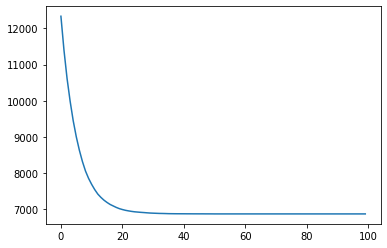

In [90]:
# 6. Build a simple NN Regression model that has one Dense unit. 
# Specify mean_squared_errorfor the loss and SGD for optimizer. 
# Allocate 30% of the data for validation. Run it for 100 epochs. 
# Plot the loss plot for training and validation.
show_result(x_standardized,y, 'SGD')

{'Intercept': 73.89582524271844, 'Coefficient of Regressin': array([-23.73391793]), 'Weoghts': [array([[-0.86662847]], dtype=float32), array([1.7799878], dtype=float32)]}


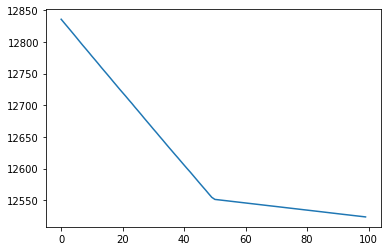

In [91]:
# 7. Build a simple NN Regression model that has one Dense unit. 
# Specify mean_squared_errorfor the loss and rmspropfor optimizer. 
# Allocate 30% of the data for validation. Run it for 100 epochs. 
# Plot the loss plot for training and validation.
show_result(x_standardized,y, 'RMSprop')